<a href="https://colab.research.google.com/github/lakshmirnair/problem-solving-in-python/blob/master/ML_algorithm/Regression/AdaboostReg_BostonData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaboost Regressor using Boston Datatset

In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.25)

1.The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeRegressor initialized with max_depth=3.  

2.Learning rate : controls the contribution of each model to the ensemble prediction.





In [3]:
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear', n_estimators=100, random_state=None) 
ada_reg.fit(xtrain, ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [4]:
#accuracy 
scores = cross_val_score(ada_reg, xtrain,ytrain,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

#Whether to shuffle the data before splitting into batches. Note that the samples within each split will be shuffled if it is true.
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


Mean cross-validataion score: 0.79
K-fold CV average score: 0.81


In [6]:
import numpy as np
ypred = ada_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))


MSE: 11.68
RMSE: 3.42


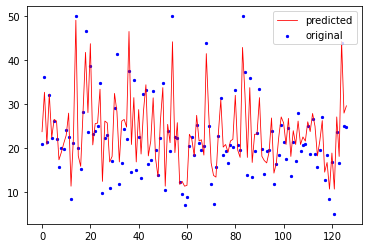

In [7]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()